In [2]:
from sklearn import cluster
from osgeo import gdal
import geopandas as gdp
import pandas as pd
import numpy as np
import rasterio as rio
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import os
import matplotlib.pyplot as plt
from glob import glob
from rasterio.plot import show

In [3]:
landsat_path = glob("LC08_L1TP_091086_20191222_20200110_01_T1_New/RT_20191222_B*.tif")
landsat_path.sort()
array_stack, meta_data = es.stack(landsat_path)

print(len(landsat_path))

7


In [7]:
dataset = gdal.Open(r'LC08_L1TP_091086_20191222_20200110_01_T1_New/RT_20191222_B7.tif')
Band7= dataset.GetRasterBand(1)
img = Band7.ReadAsArray()
img.dtype


dtype('float32')

In [119]:
X = img.reshape((-1,1))
X

array([[ 2.5361550e-01],
       [ 2.3427235e-01],
       [ 2.3670782e-01],
       ...,
       [-9.9900000e+02],
       [-9.9900000e+02],
       [-9.9900000e+02]], dtype=float32)

In [120]:
k_means = cluster.KMeans(n_clusters=5, n_init=2)
_ = k_means.fit(X)

C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)


In [121]:
X_clustered = k_means.labels_
X_clustered = X_clustered.reshape(img.shape)

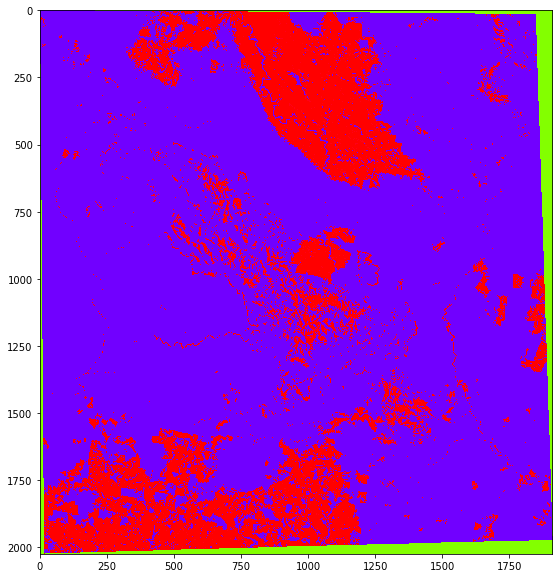

In [122]:
plt.figure(figsize=(10,10))
plt.imshow(X_clustered, cmap="hsv")
plt.show()

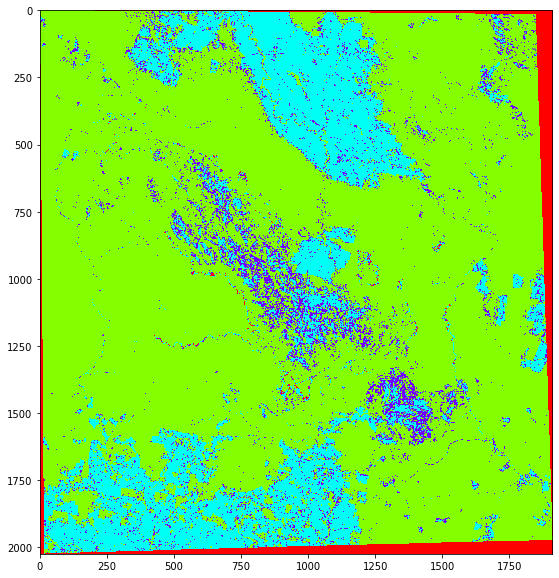

In [123]:
k_means = cluster.KMeans(n_clusters=5, n_init=10,)
_ = k_means.fit(X)


X_clustered = k_means.labels_
X_clustered = X_clustered.reshape(img.shape)

plt.figure(figsize=(10,10))
plt.imshow(X_clustered, cmap="hsv")
plt.show()

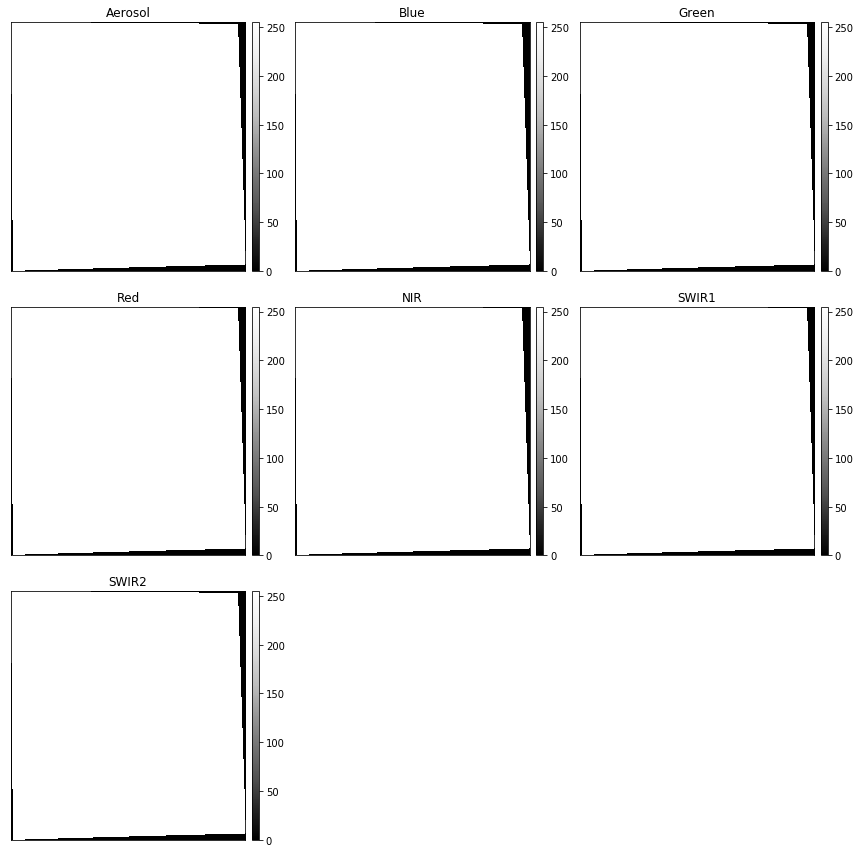

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D9201D8888>,
      dtype=object)

In [124]:
title = ['Aerosol' , 'Blue' , 'Green' , 'Red' , 'NIR' , 'SWIR1' , 'SWIR2']


ep.plot_bands(array_stack,
              title=title)

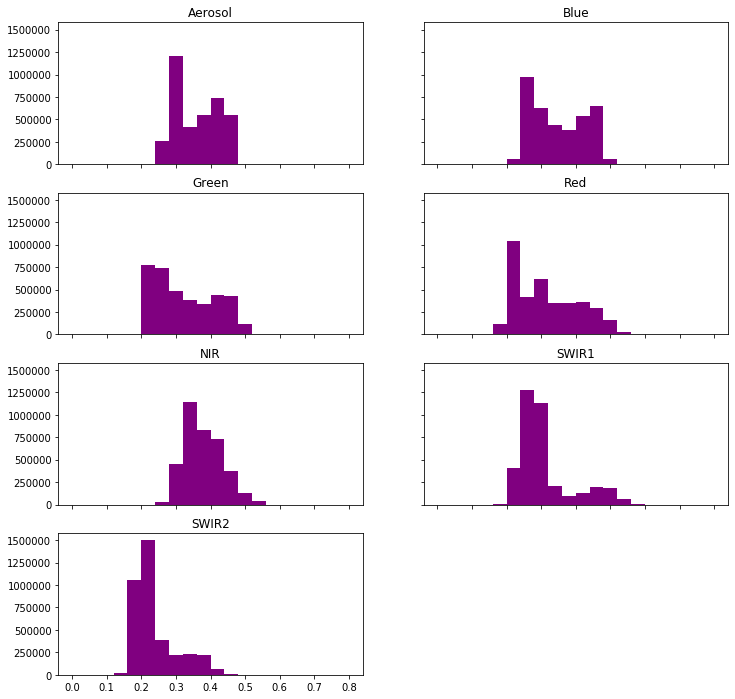

In [125]:
ep.hist(array_stack,
        title=title,hist_range=(0,0.8))
plt.show()

In [147]:
dataset = gdal.Open(r'LC08_L1TP_090083_20191215_20191226_01_T1_NEW/RT_20191226_B7.tif')
swirBand=  dataset.GetRasterBand(1)
dataset

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000002D91CF23C30> >

In [148]:
img = dataset.ReadAsArray()
img.dtype

dtype('float32')

In [128]:
X = img.reshape((-1,1))
X
# np.where(np.isnan(X))
# X= np.nan_to_num(X)
# X

array([[ 2.4158645e-01],
       [ 2.4592754e-01],
       [ 2.5369582e-01],
       ...,
       [-9.9900000e+02],
       [-9.9900000e+02],
       [-9.9900000e+02]], dtype=float32)

In [129]:
k_means = cluster.KMeans(n_clusters=5, n_init=2)
_ = k_means.fit(X)

C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)


In [130]:
X_clustered = k_means.labels_
X_clustered = X_clustered.reshape(img.shape)

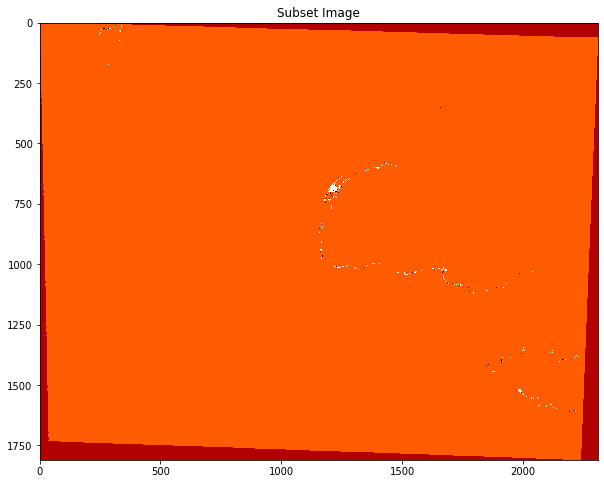

In [141]:
plt.figure(figsize=(10,10))
plt.imshow(X_clustered, cmap="hot")
plt.title('Subset Image')
plt.show()

In [4]:
landsat_path = glob("LC08_L1TP_090083_20191215_20191226_01_T1_NEW/RT_20191226_B*.tif")
landsat_path.sort()
array_stack, meta_data = es.stack(landsat_path)

print(len(landsat_path))

7


In [5]:
landsat_path

['LC08_L1TP_090083_20191215_20191226_01_T1_NEW\\RT_20191226_B1.tif',
 'LC08_L1TP_090083_20191215_20191226_01_T1_NEW\\RT_20191226_B2.tif',
 'LC08_L1TP_090083_20191215_20191226_01_T1_NEW\\RT_20191226_B3.tif',
 'LC08_L1TP_090083_20191215_20191226_01_T1_NEW\\RT_20191226_B4.tif',
 'LC08_L1TP_090083_20191215_20191226_01_T1_NEW\\RT_20191226_B5.tif',
 'LC08_L1TP_090083_20191215_20191226_01_T1_NEW\\RT_20191226_B6.tif',
 'LC08_L1TP_090083_20191215_20191226_01_T1_NEW\\RT_20191226_B7.tif']

C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)


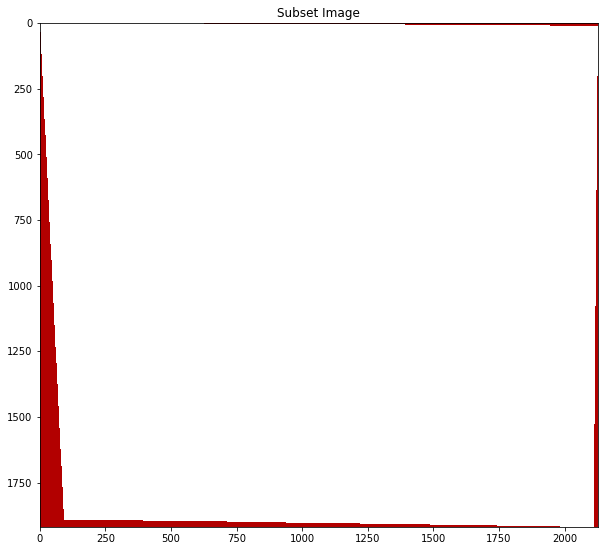

C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)


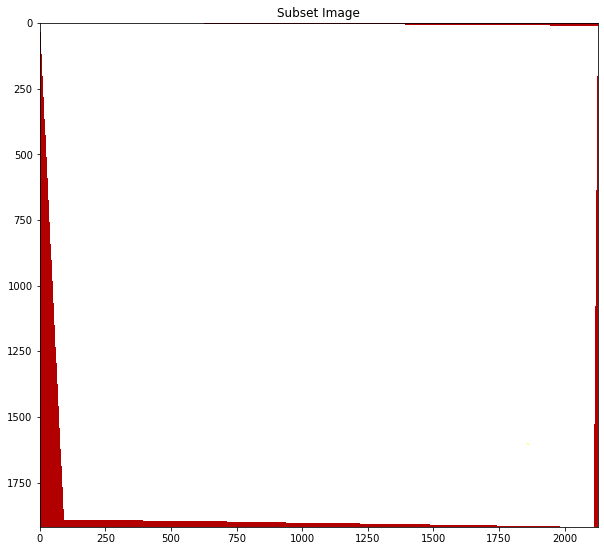

C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)


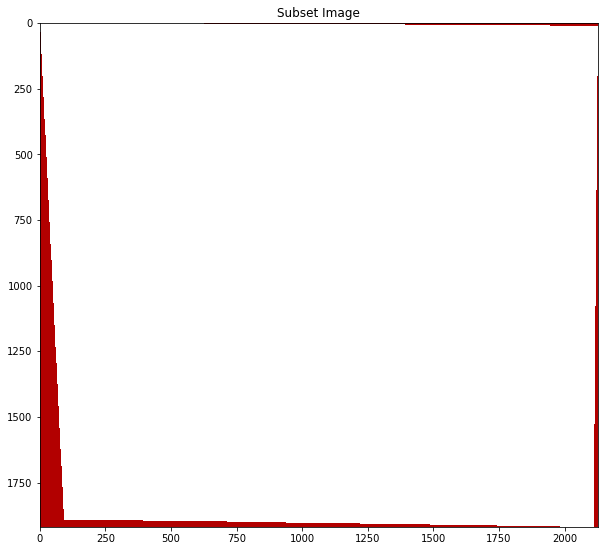

C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)


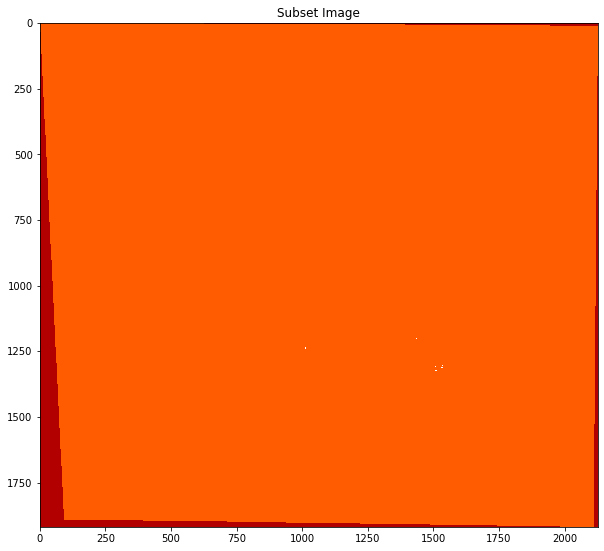

C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)


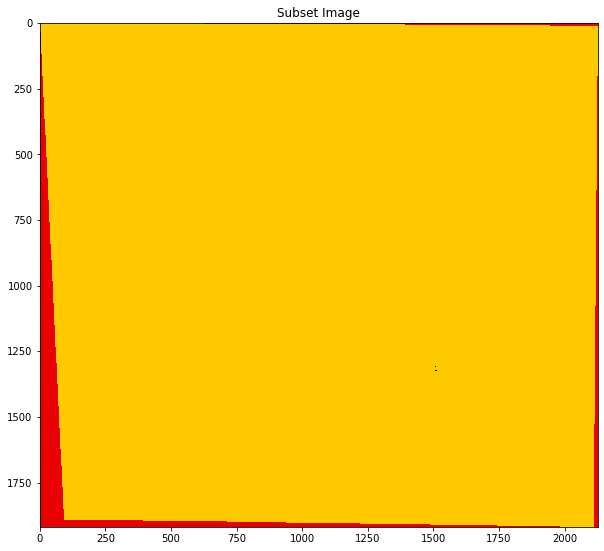

C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)


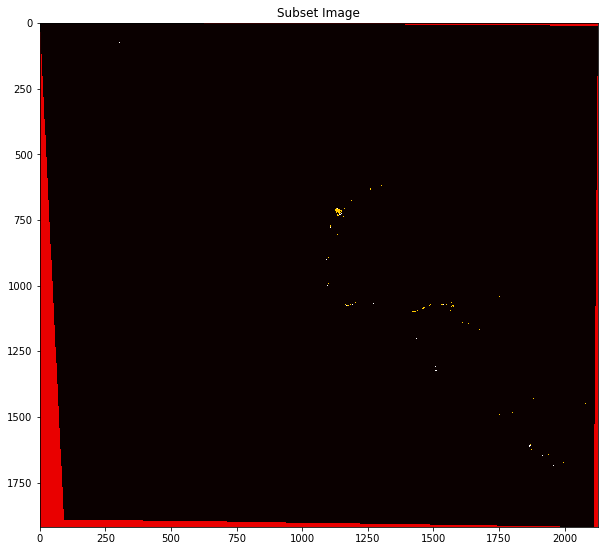

C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)


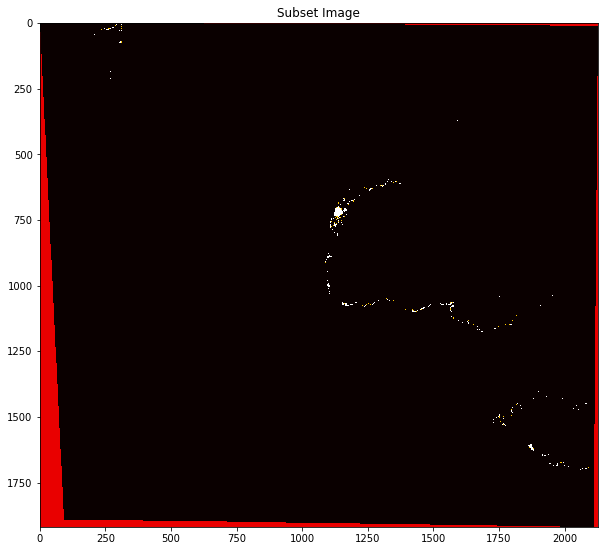

In [11]:


for files in landsat_path:
    dataset = gdal.Open(files)
    Band= dataset.GetRasterBand(1)
    img = Band.ReadAsArray()
    X = img.reshape((-1,1))
    k_means = cluster.KMeans(n_clusters=5, n_init=2)
    _ = k_means.fit(X)
    X_clustered = k_means.labels_
    X_clustered = X_clustered.reshape(img.shape)

    plt.figure(figsize=(10,10))
    plt.imshow(X_clustered, cmap="hot")
    plt.title('Subset Image')
    plt.show()



In [12]:
landsat_path = glob("LC08_L1TP_091086_20191222_20200110_01_T1_New/RT_20191222_B*.tif")
landsat_path.sort()
array_stack, meta_data = es.stack(landsat_path)

print(len(landsat_path))

7


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)


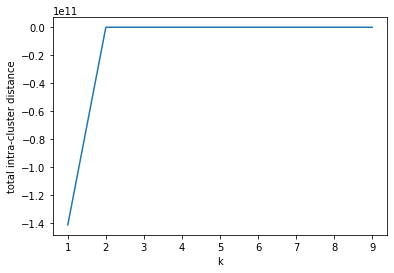

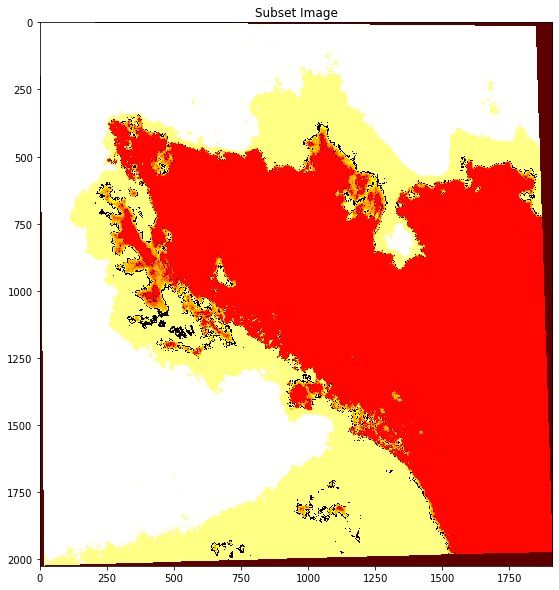

C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users

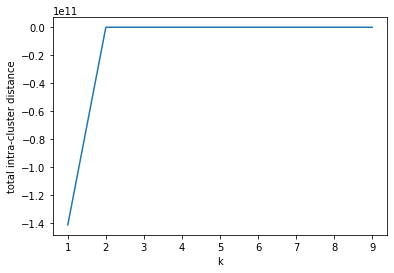

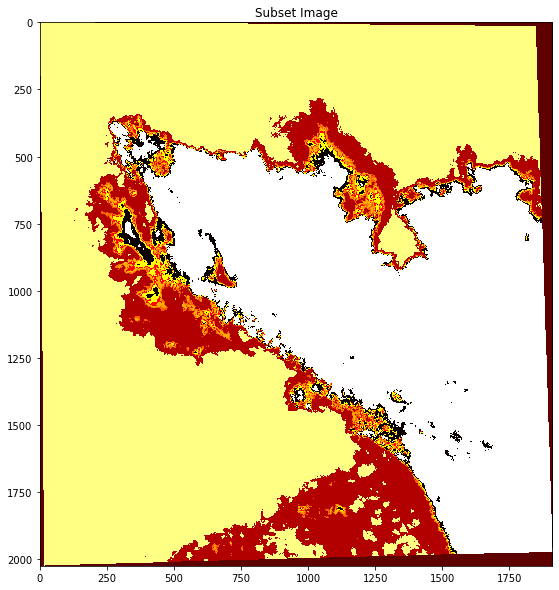

C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users

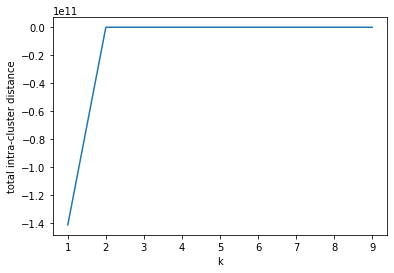

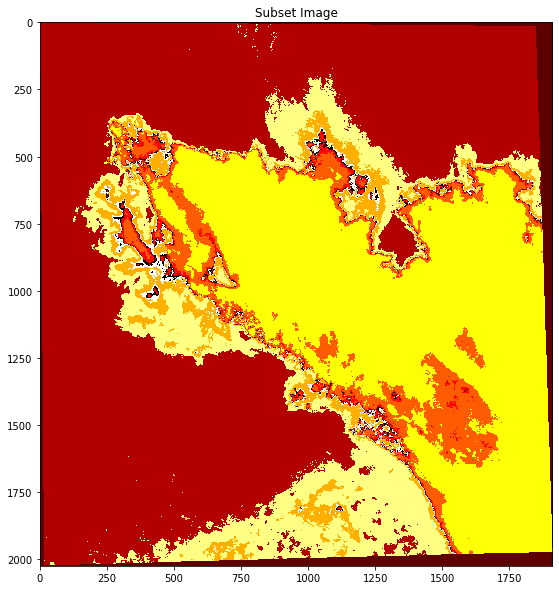

C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users

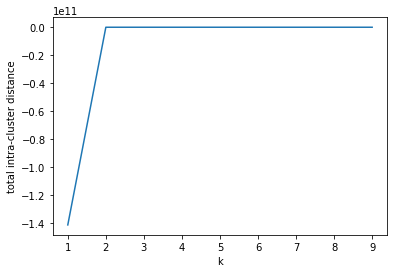

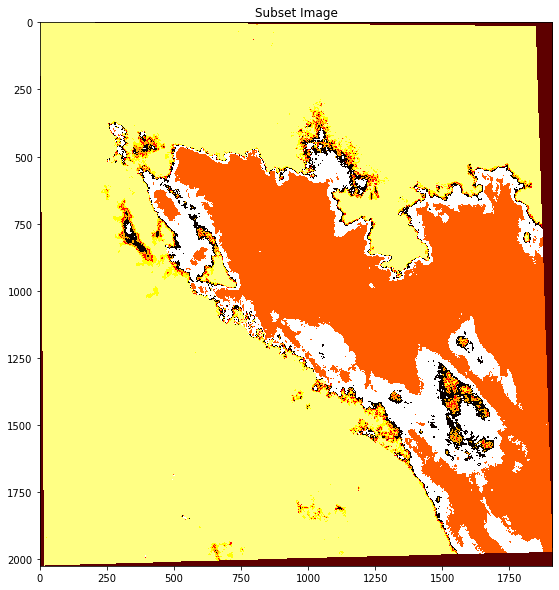

C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)


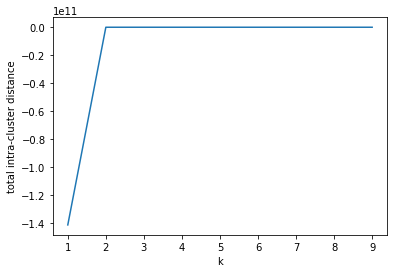

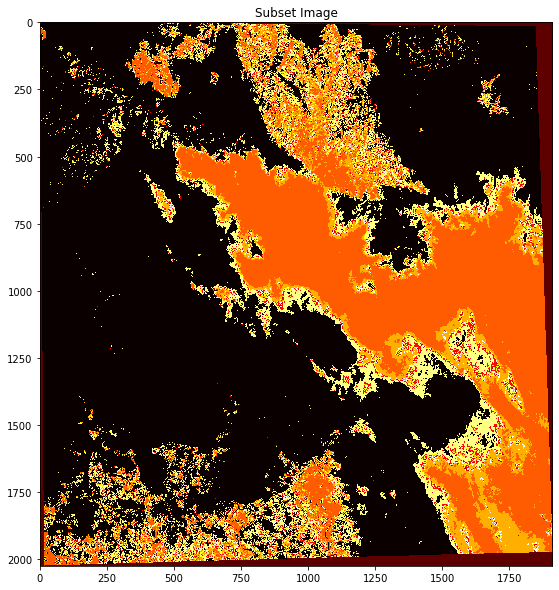

C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users

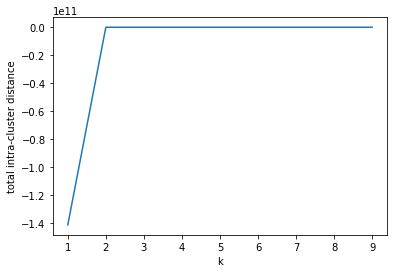

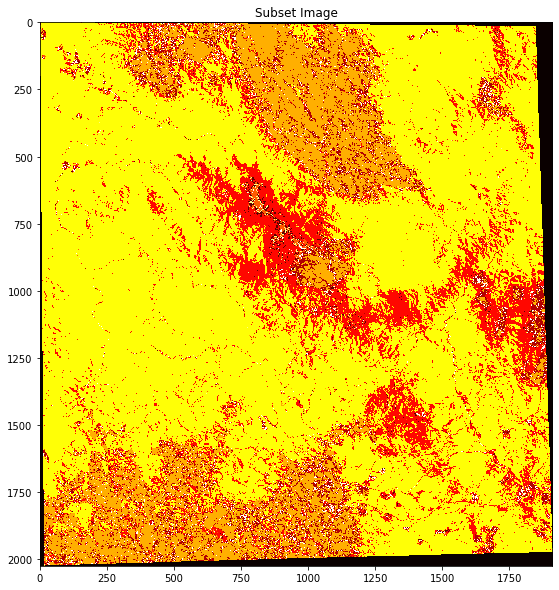

C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)


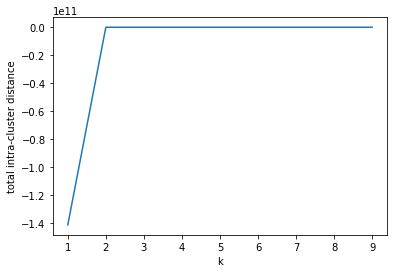

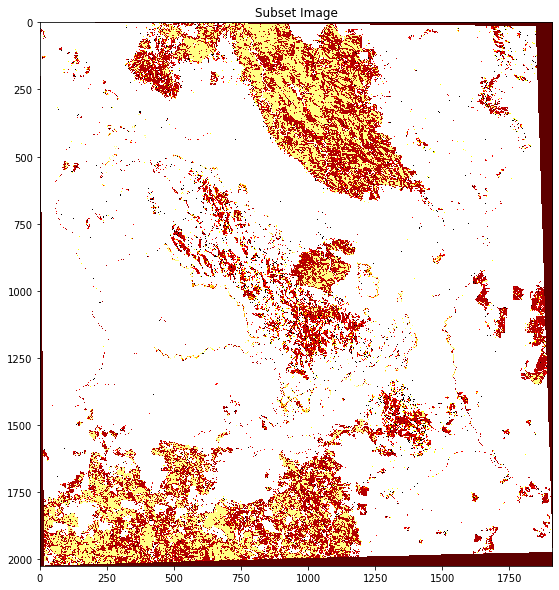

In [17]:
for files in landsat_path:
    dataset = gdal.Open(files)
    Band= dataset.GetRasterBand(1)
    img = Band.ReadAsArray()
    X = img.reshape((-1,1))
    # clustering for k = 1 to k = 10
    
    ks = range(1,10)
    scores = []
    
    for k in ks:
        k_means = cluster.KMeans(n_clusters=k, n_init=2)
        k_means.fit_predict(X)
        scores.append(k_means.score(X))

    plt.plot(ks, scores)
    plt.ylabel('total intra-cluster distance')
    plt.xlabel('k')
    plt.show()
    
    X_clustered = k_means.labels_
    X_clustered = X_clustered.reshape(img.shape)

    plt.figure(figsize=(10,10))
    plt.imshow(X_clustered, cmap="hot")
    plt.title('Subset Image')
    plt.show()

7
Working on LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B1.tif
Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B1.tif K VAlue: 1


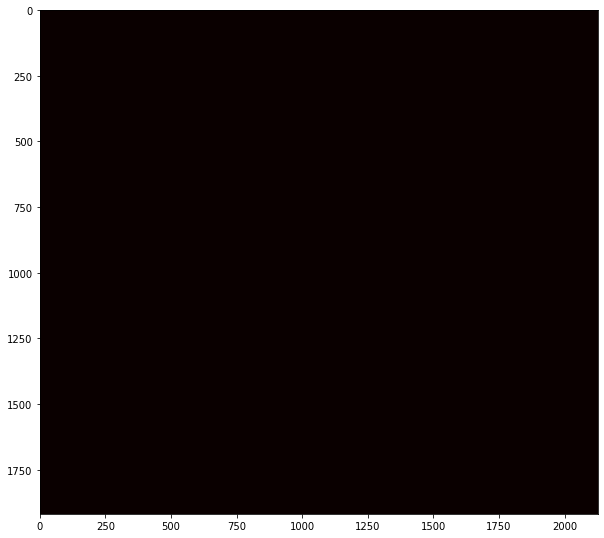

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B1.tif K VAlue: 2


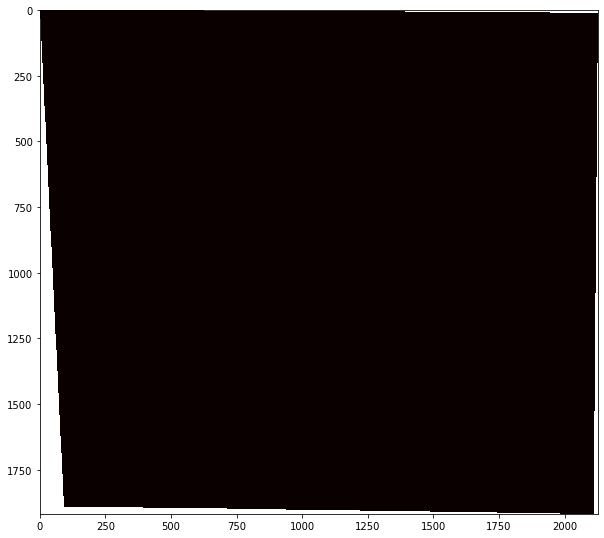

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B1.tif K VAlue: 3


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)


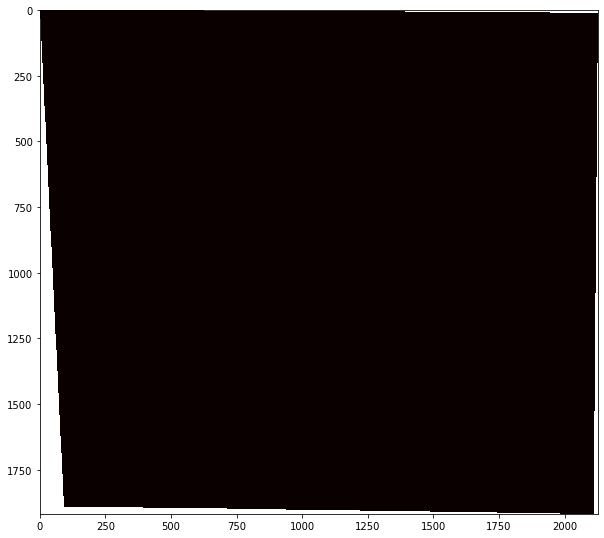

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B1.tif K VAlue: 4


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)


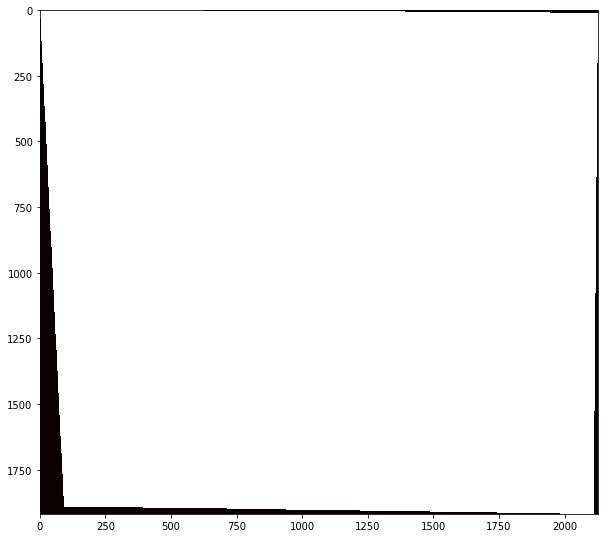

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B1.tif K VAlue: 5


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)


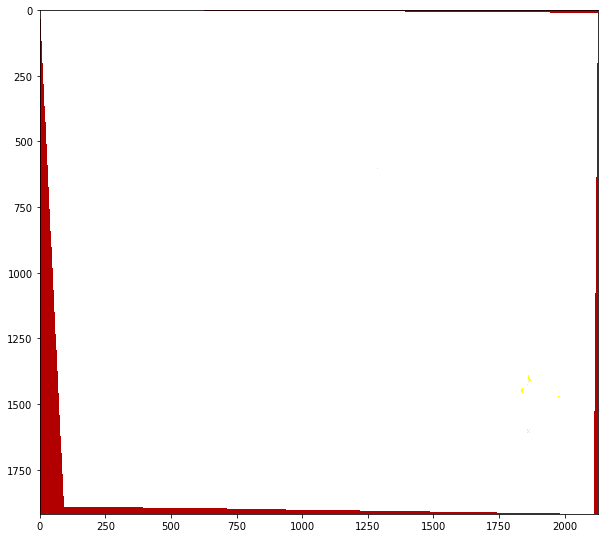

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B1.tif K VAlue: 6


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)


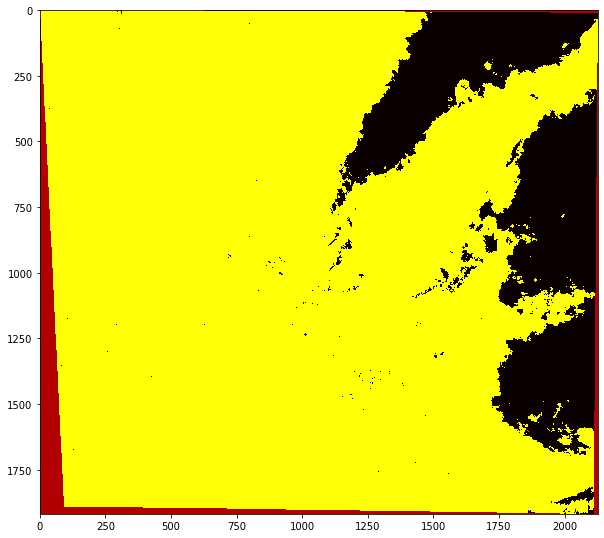

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B1.tif K VAlue: 7


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)


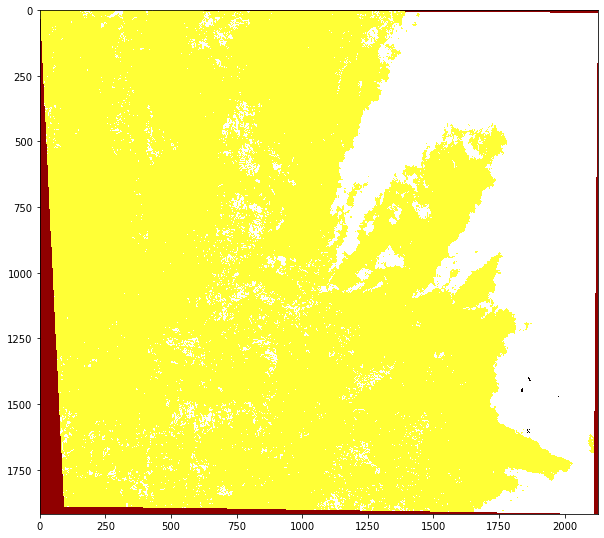

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B1.tif K VAlue: 8


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)


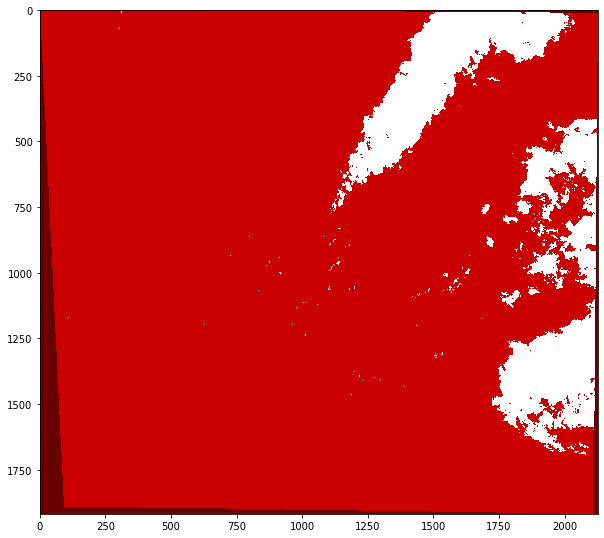

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B1.tif K VAlue: 9


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)


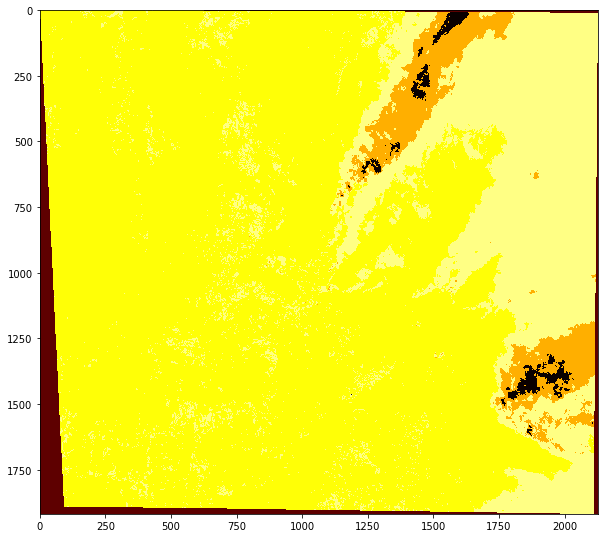

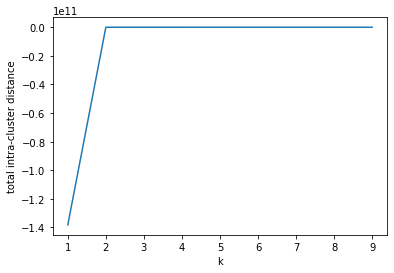

Working on LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B2.tif
Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B2.tif K VAlue: 1


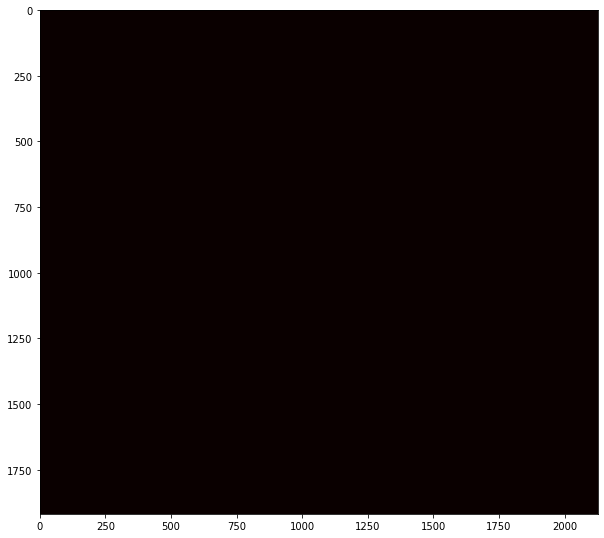

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B2.tif K VAlue: 2


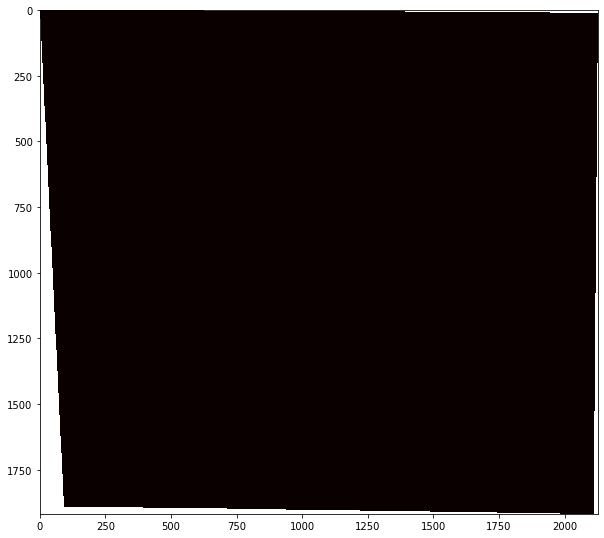

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B2.tif K VAlue: 3


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)


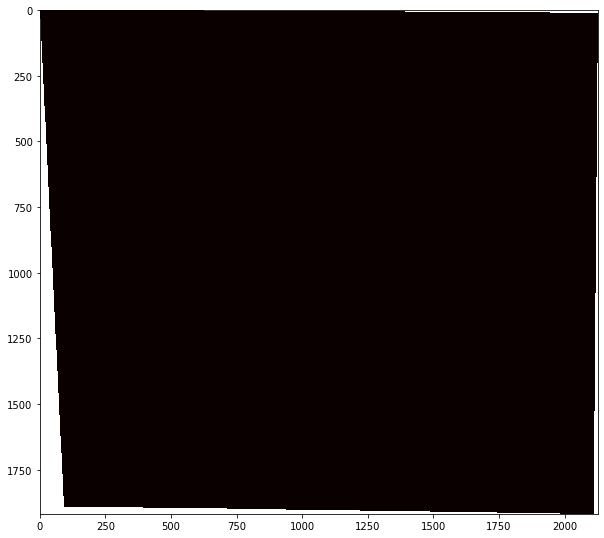

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B2.tif K VAlue: 4


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)


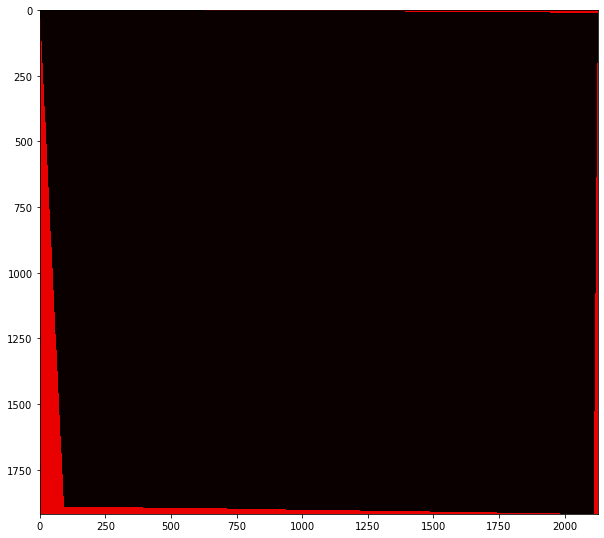

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B2.tif K VAlue: 5


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)


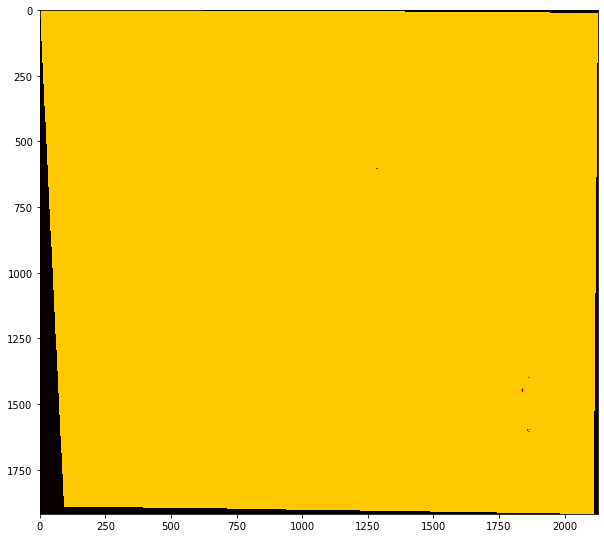

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B2.tif K VAlue: 6


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)


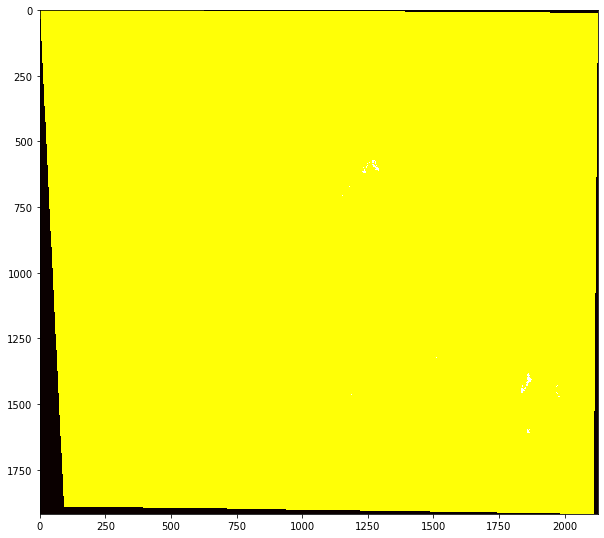

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B2.tif K VAlue: 7


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)


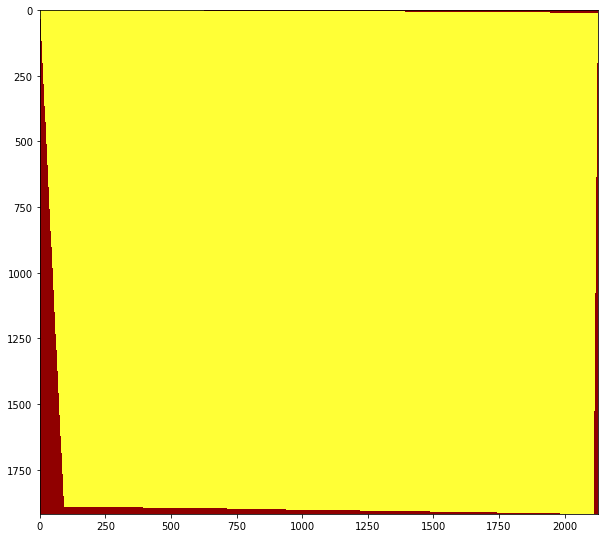

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B2.tif K VAlue: 8


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)


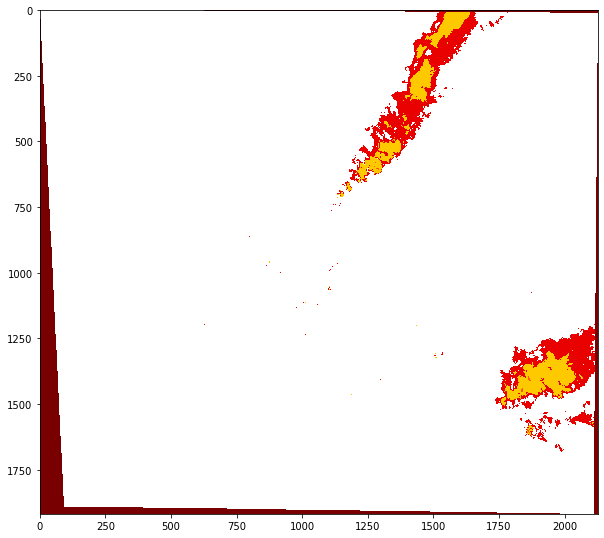

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B2.tif K VAlue: 9


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)


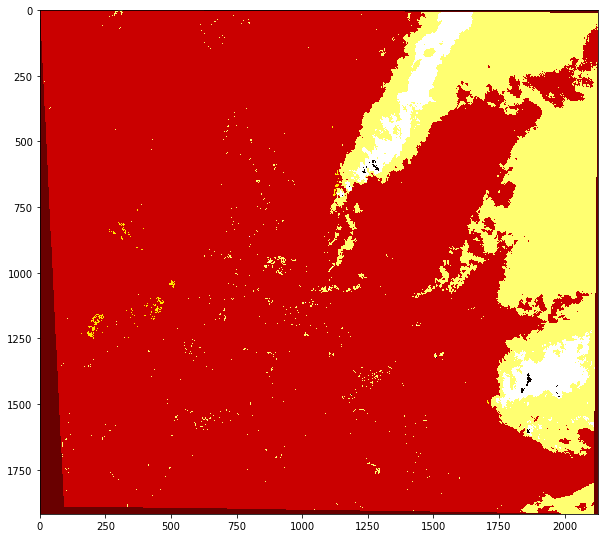

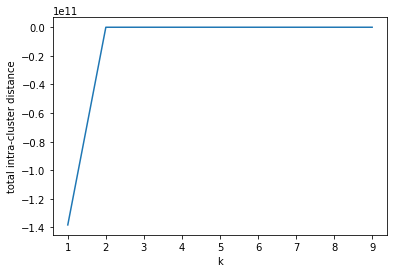

Working on LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B3.tif
Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B3.tif K VAlue: 1


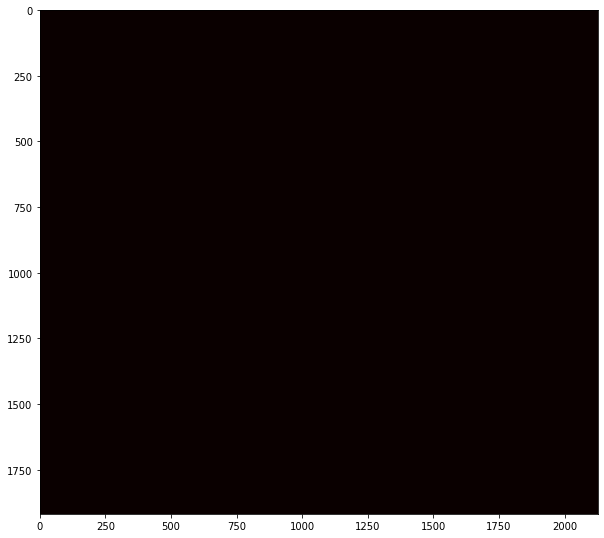

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B3.tif K VAlue: 2


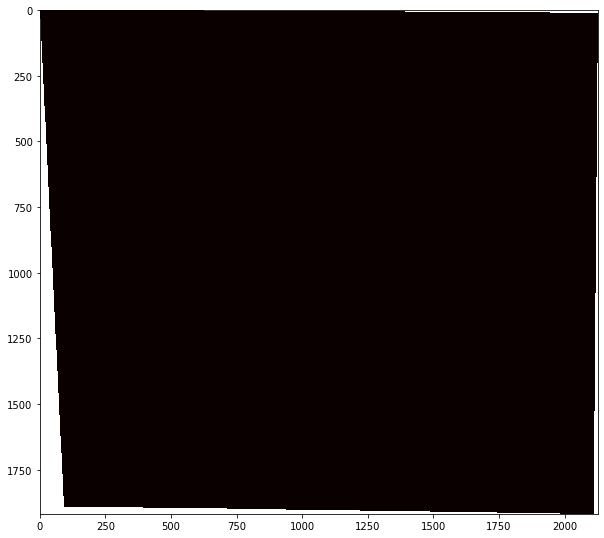

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B3.tif K VAlue: 3


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)


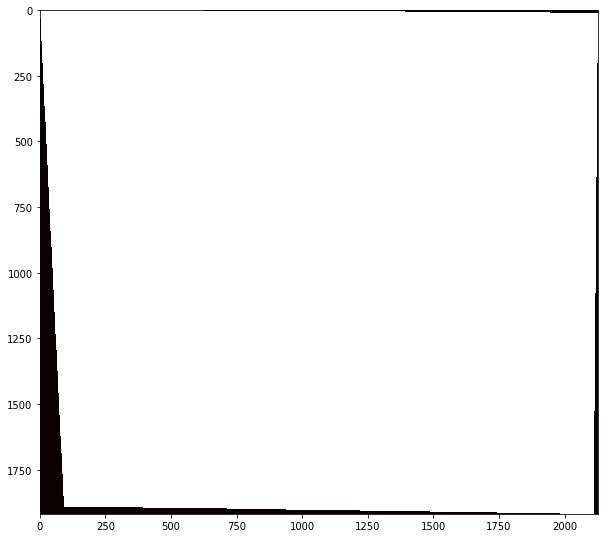

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B3.tif K VAlue: 4


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)


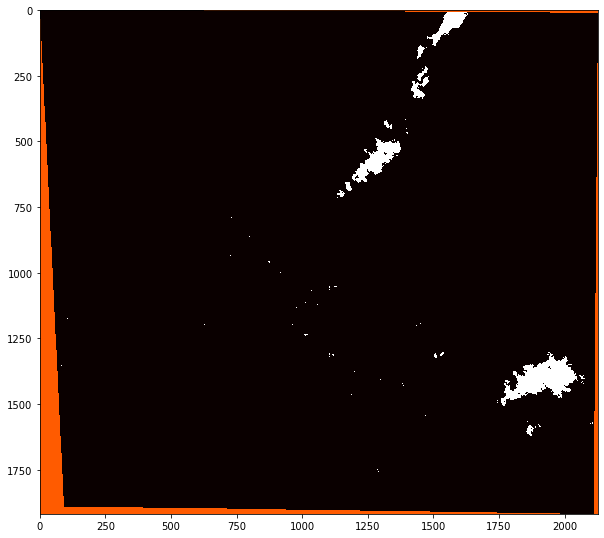

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B3.tif K VAlue: 5


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)


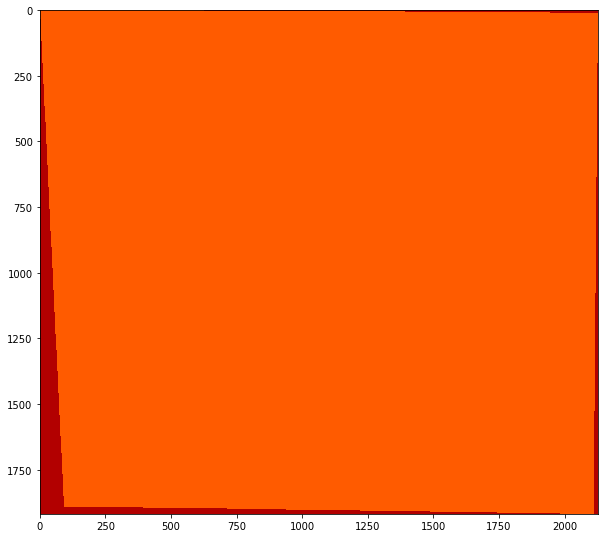

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B3.tif K VAlue: 6


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)


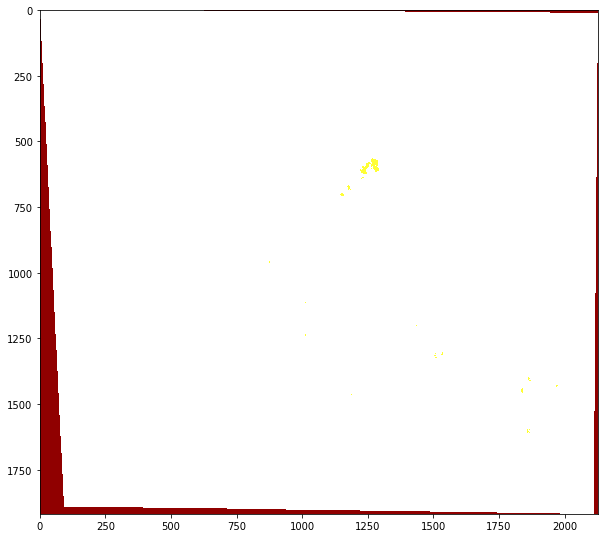

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B3.tif K VAlue: 7


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)


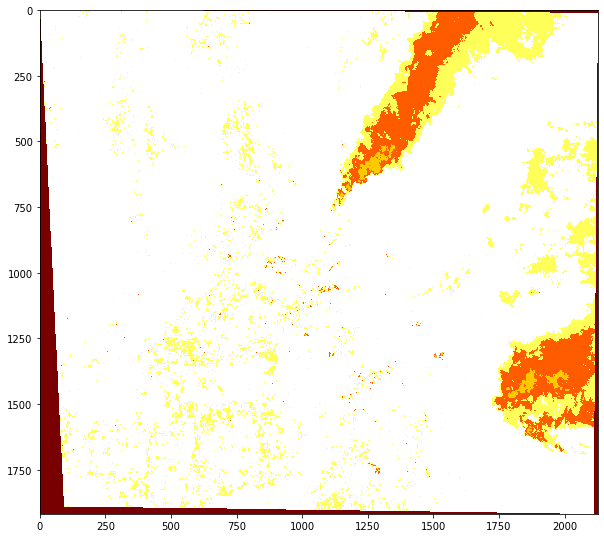

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B3.tif K VAlue: 8


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)


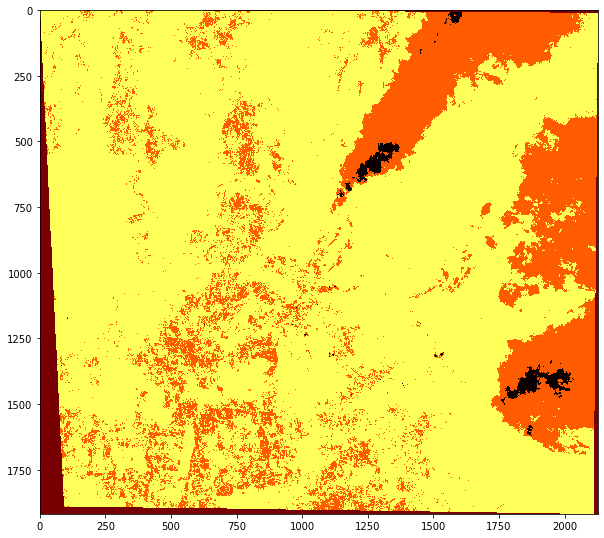

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B3.tif K VAlue: 9


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)


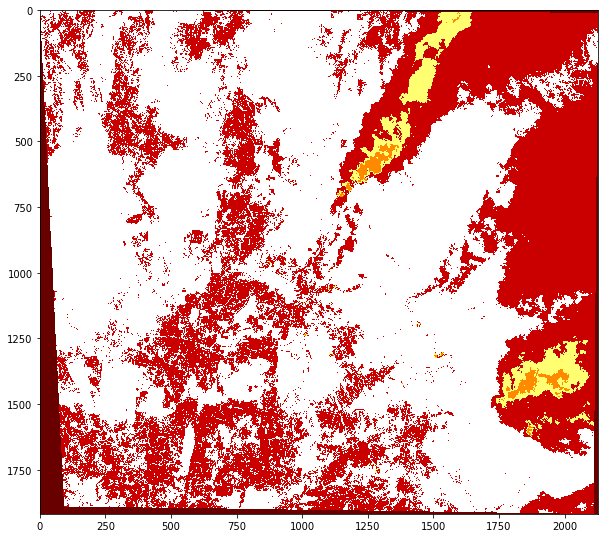

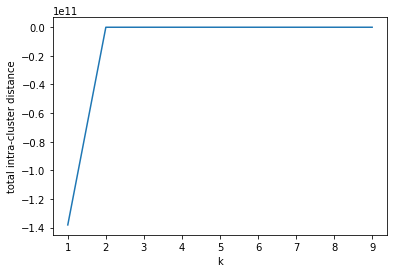

Working on LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B4.tif
Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B4.tif K VAlue: 1


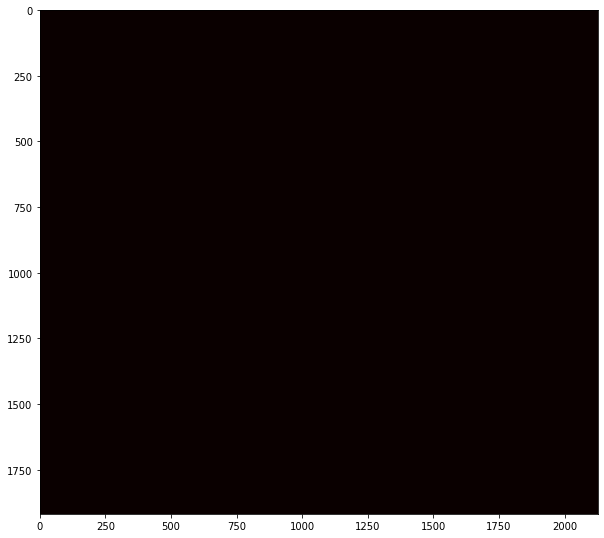

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B4.tif K VAlue: 2


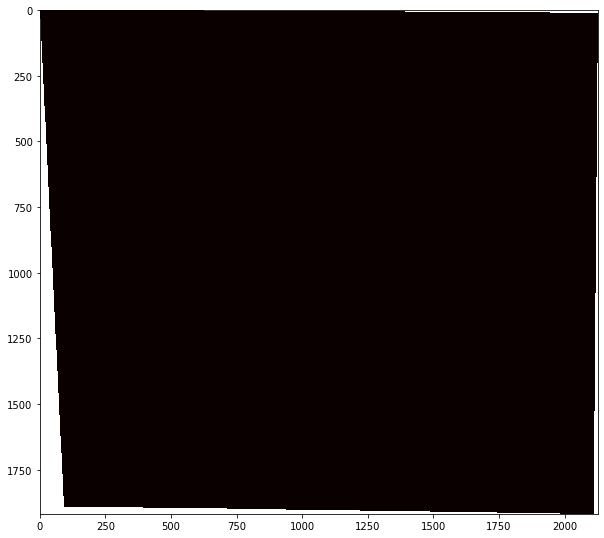

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B4.tif K VAlue: 3


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)


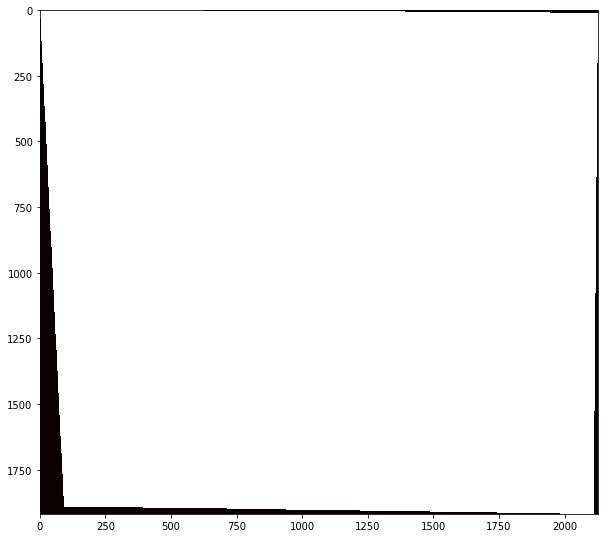

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B4.tif K VAlue: 4


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)


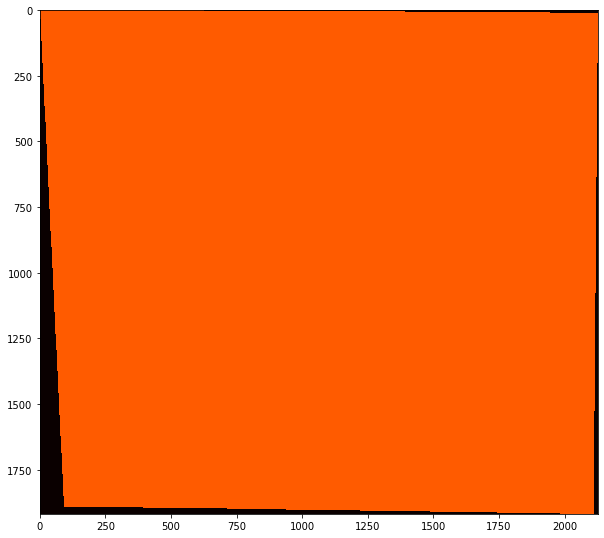

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B4.tif K VAlue: 5


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)


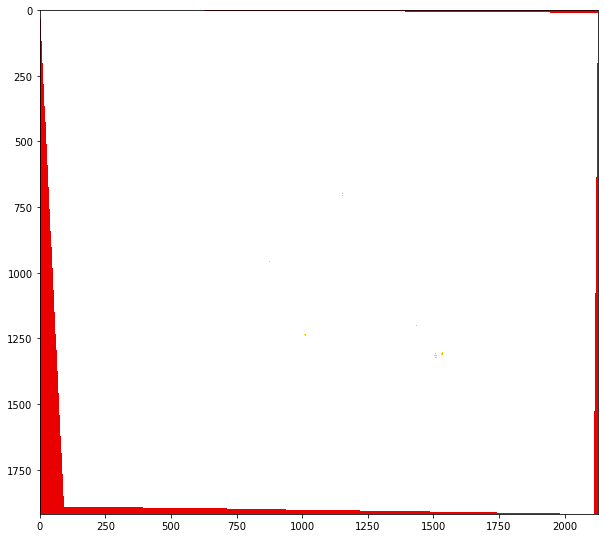

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B4.tif K VAlue: 6


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)


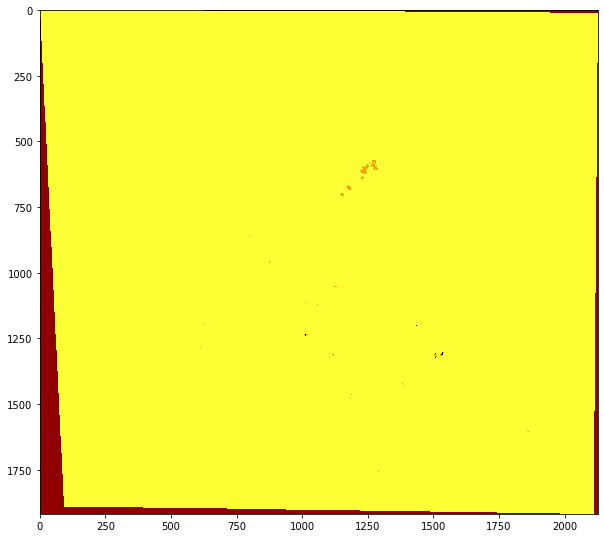

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B4.tif K VAlue: 7


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)


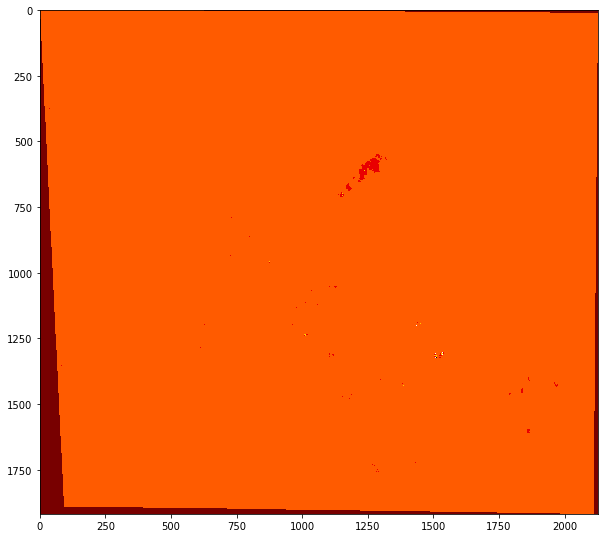

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B4.tif K VAlue: 8


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)


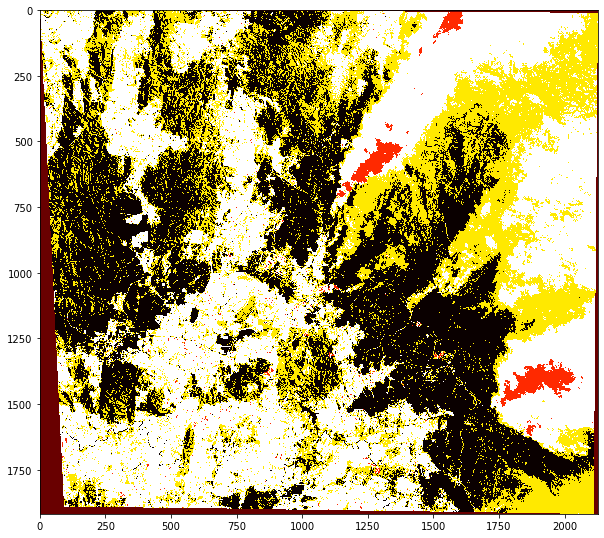

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B4.tif K VAlue: 9


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)


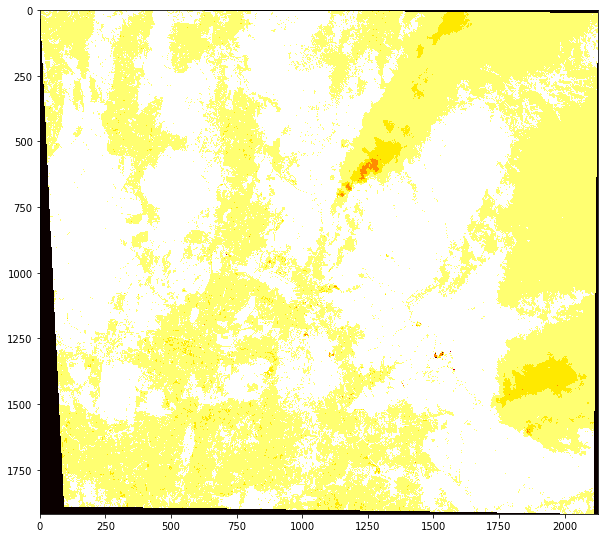

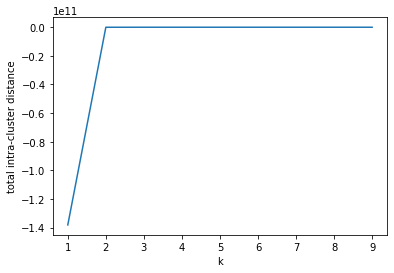

Working on LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B5.tif
Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B5.tif K VAlue: 1


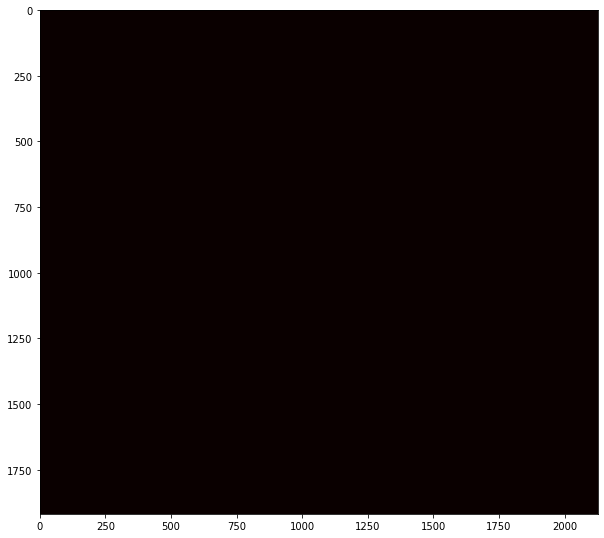

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B5.tif K VAlue: 2


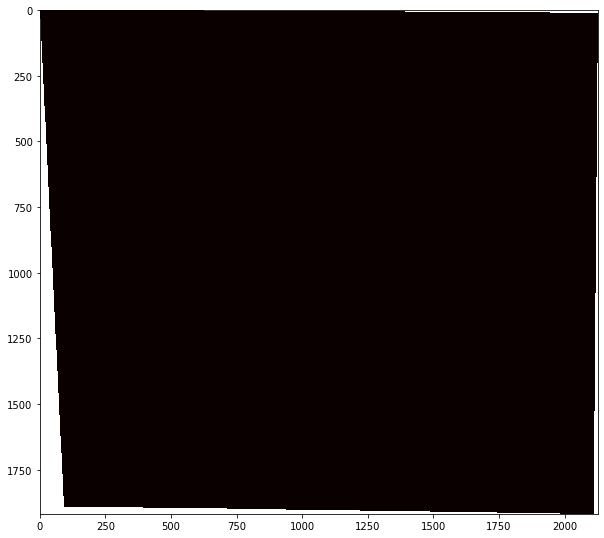

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B5.tif K VAlue: 3


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)


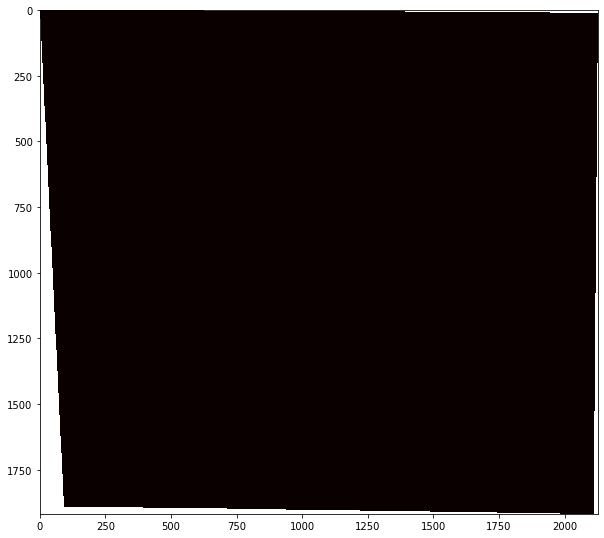

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B5.tif K VAlue: 4


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)


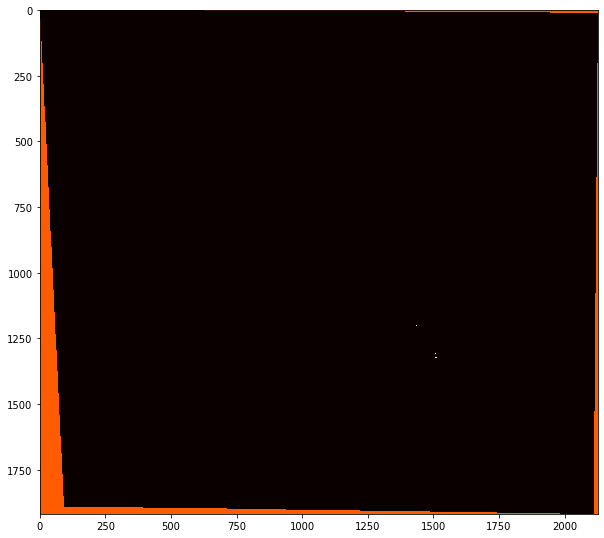

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B5.tif K VAlue: 5


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)


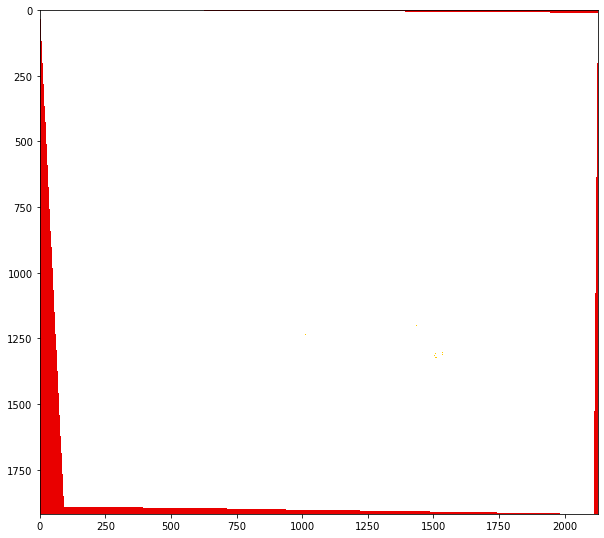

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B5.tif K VAlue: 6


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)


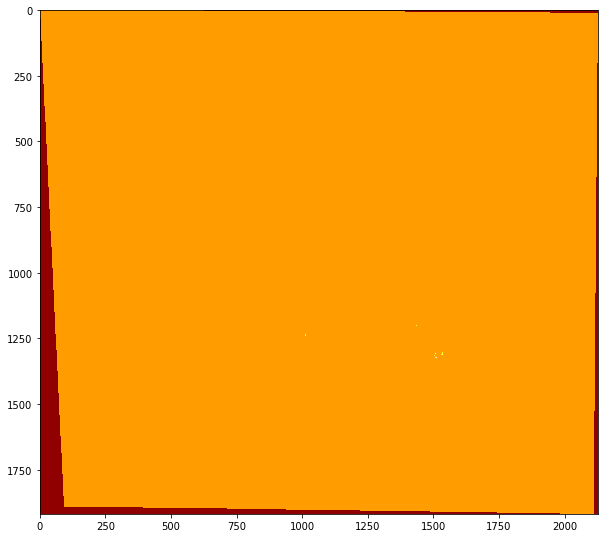

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B5.tif K VAlue: 7


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)


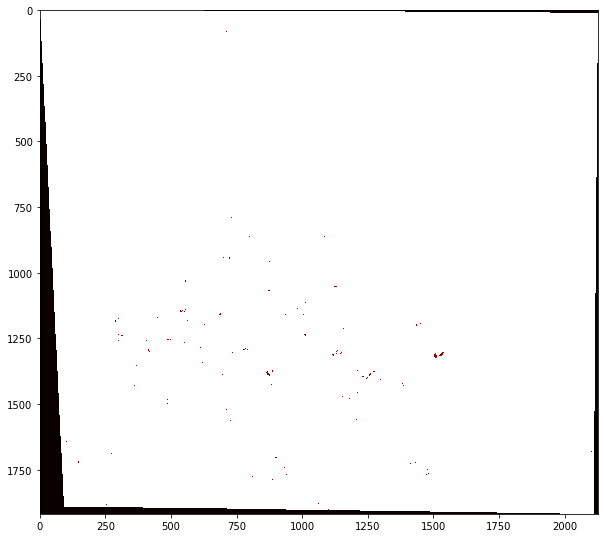

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B5.tif K VAlue: 8


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)


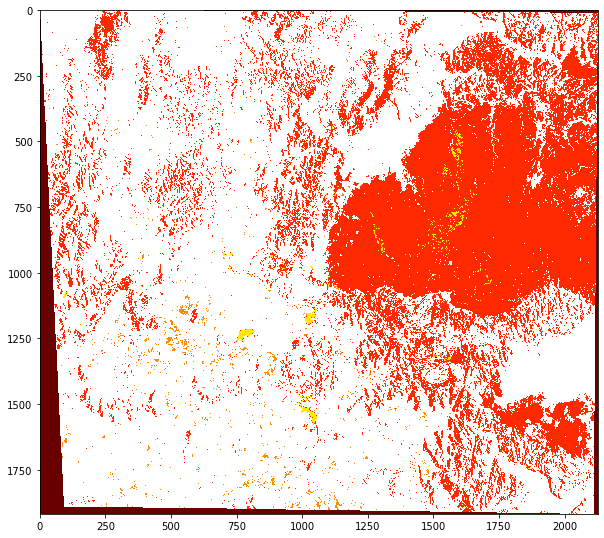

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B5.tif K VAlue: 9


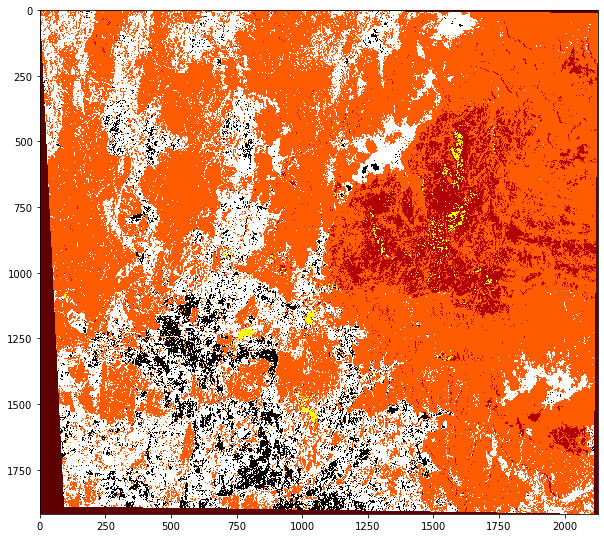

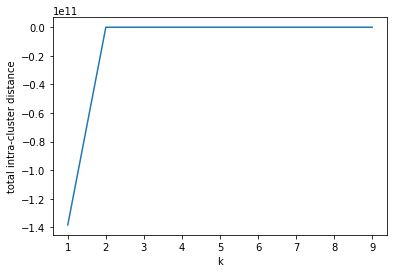

Working on LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B6.tif
Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B6.tif K VAlue: 1


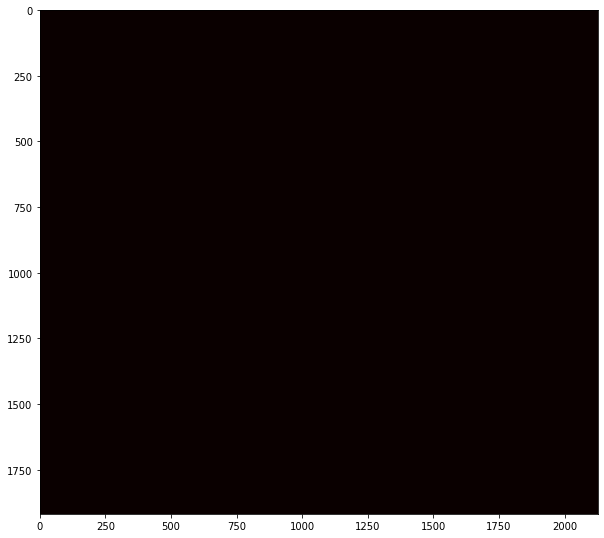

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B6.tif K VAlue: 2


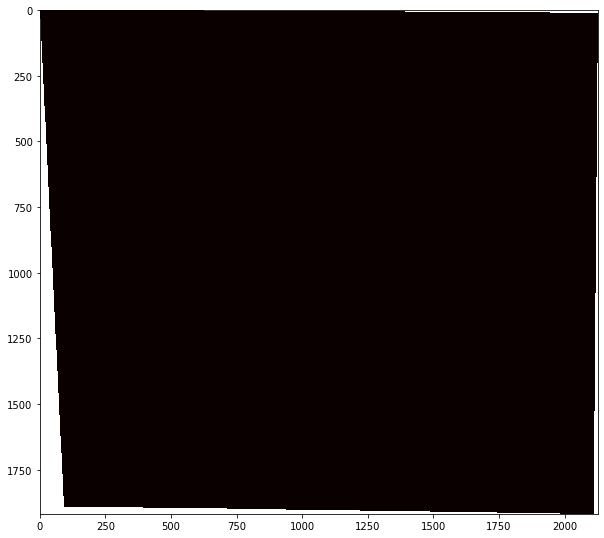

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B6.tif K VAlue: 3


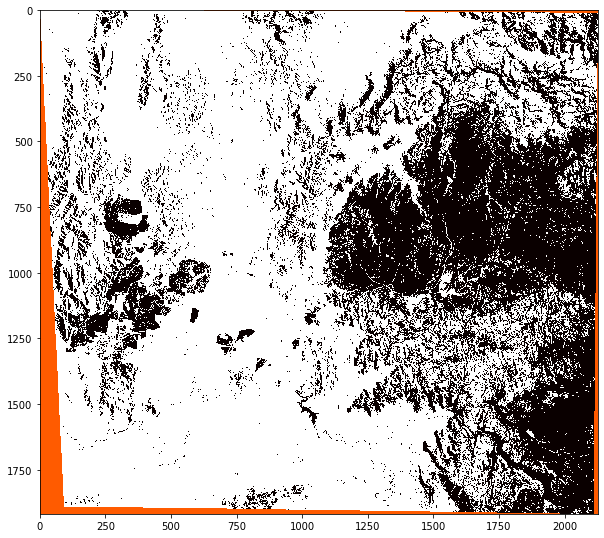

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B6.tif K VAlue: 4


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)


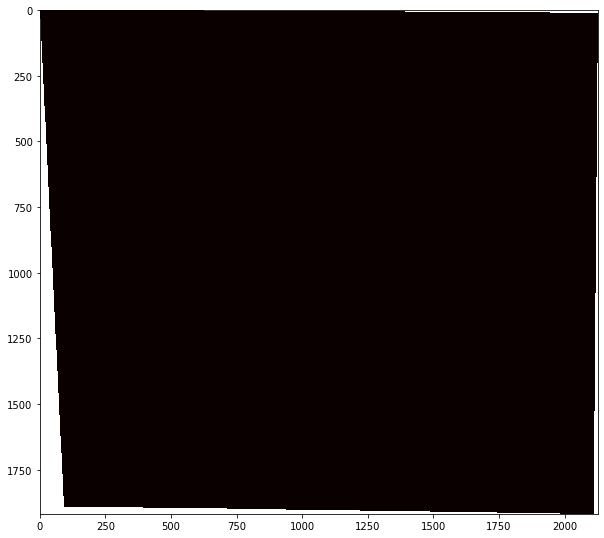

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B6.tif K VAlue: 5


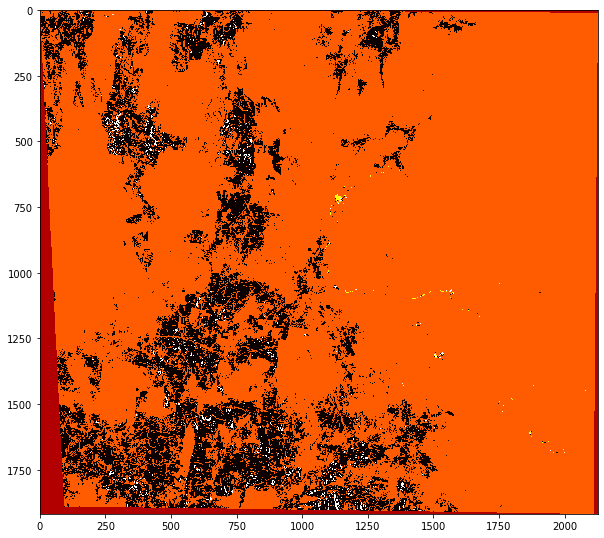

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B6.tif K VAlue: 6


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)


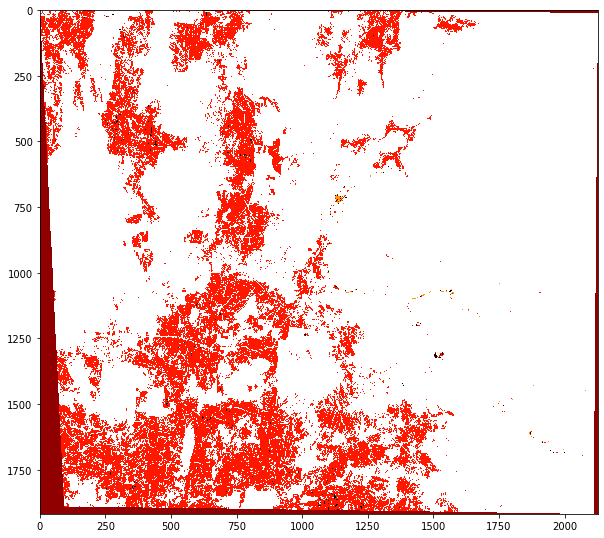

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B6.tif K VAlue: 7


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)


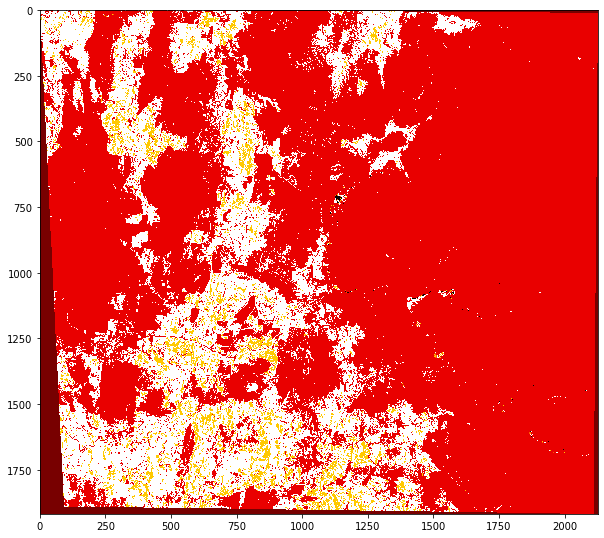

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B6.tif K VAlue: 8


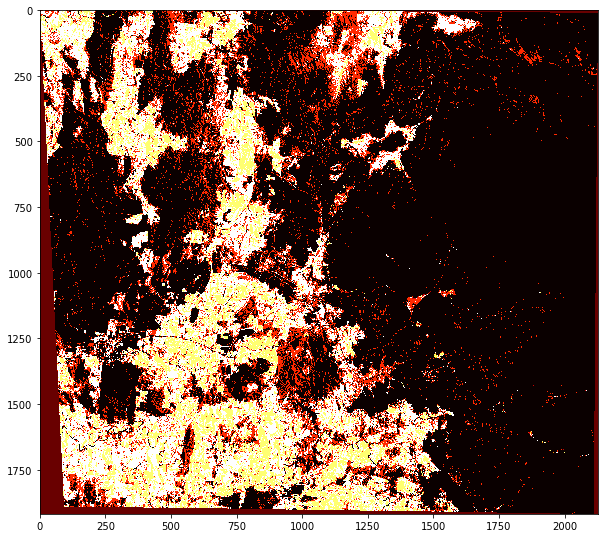

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B6.tif K VAlue: 9


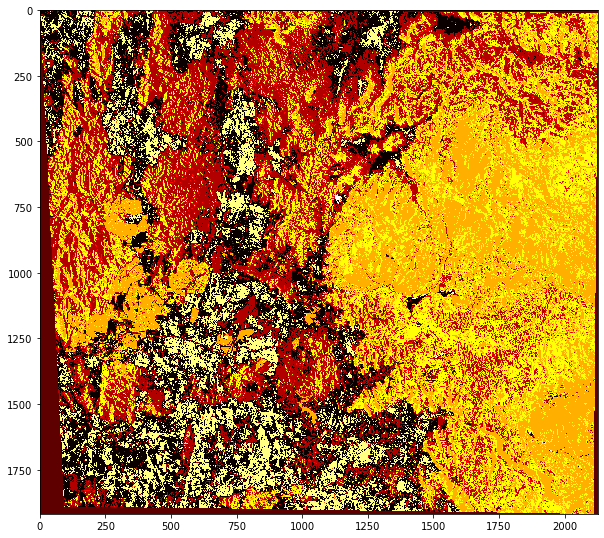

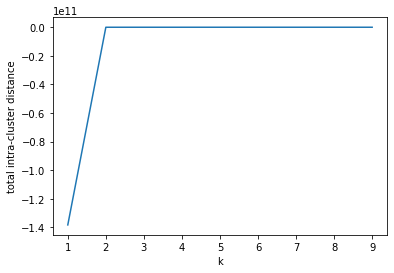

Working on LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B7.tif
Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B7.tif K VAlue: 1


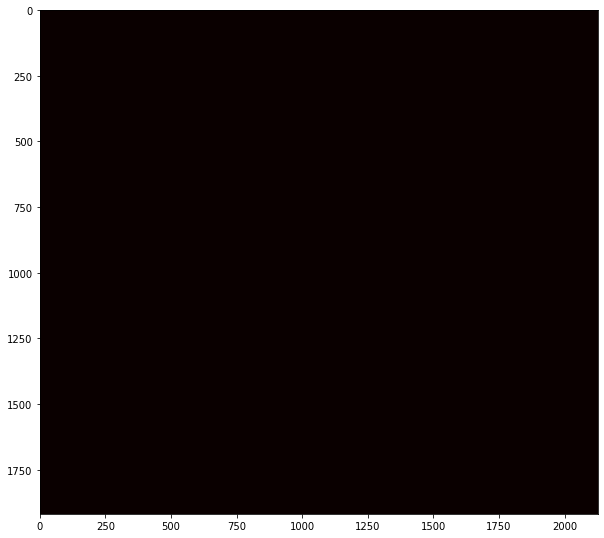

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B7.tif K VAlue: 2


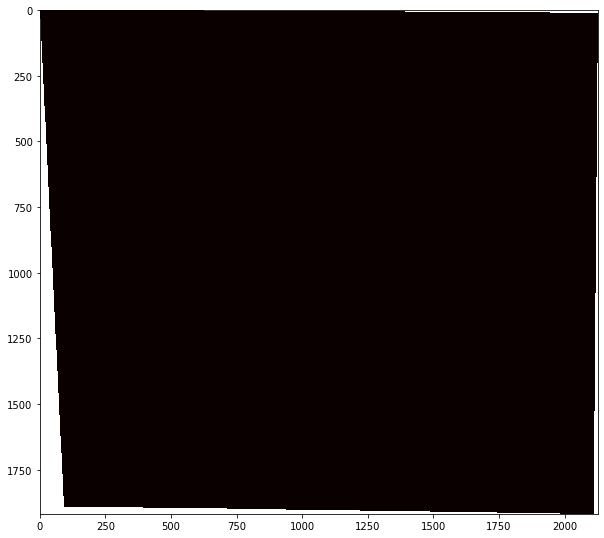

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B7.tif K VAlue: 3


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)


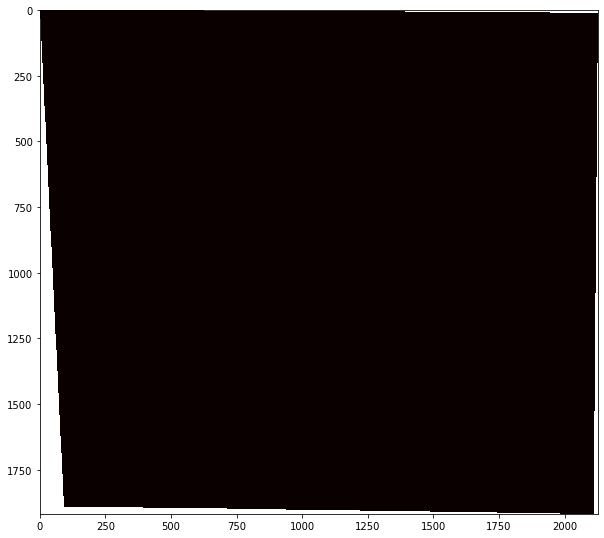

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B7.tif K VAlue: 4


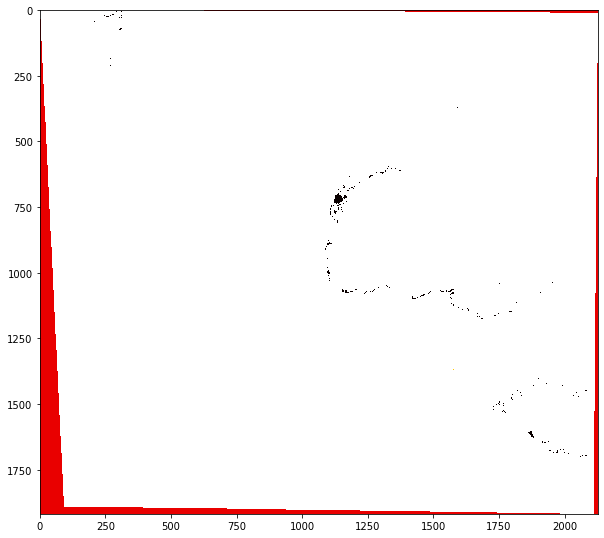

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B7.tif K VAlue: 5


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)


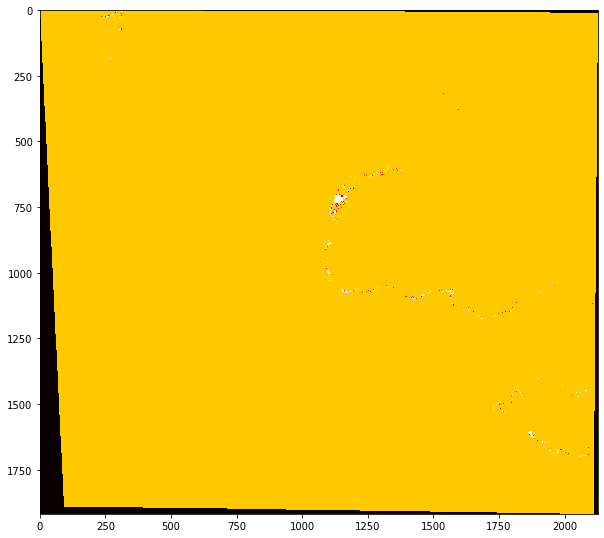

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B7.tif K VAlue: 6


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)


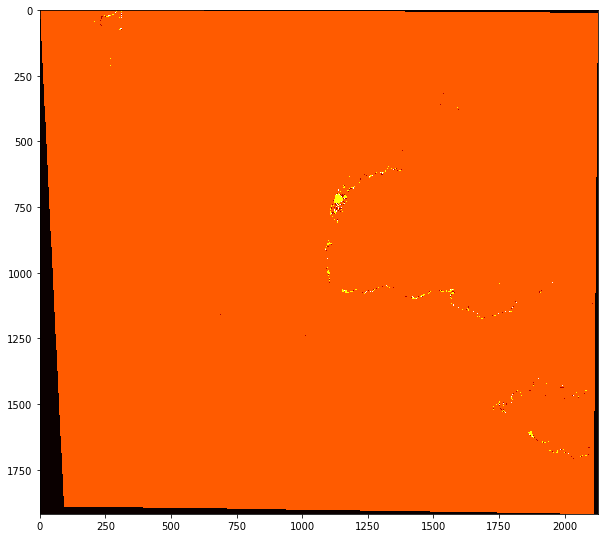

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B7.tif K VAlue: 7


C:\Users\luisg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)


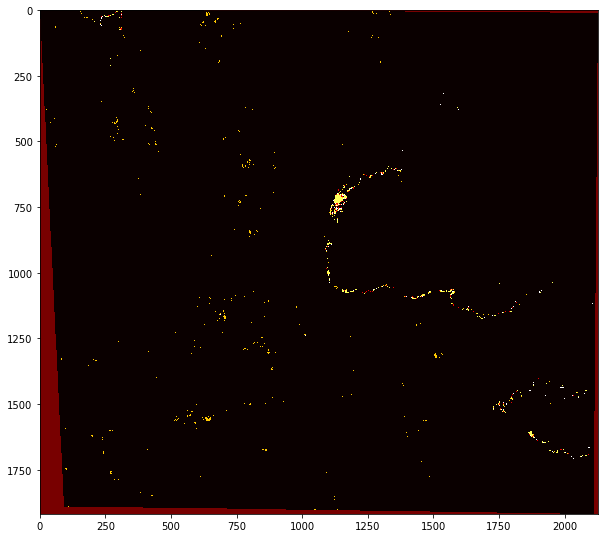

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B7.tif K VAlue: 8


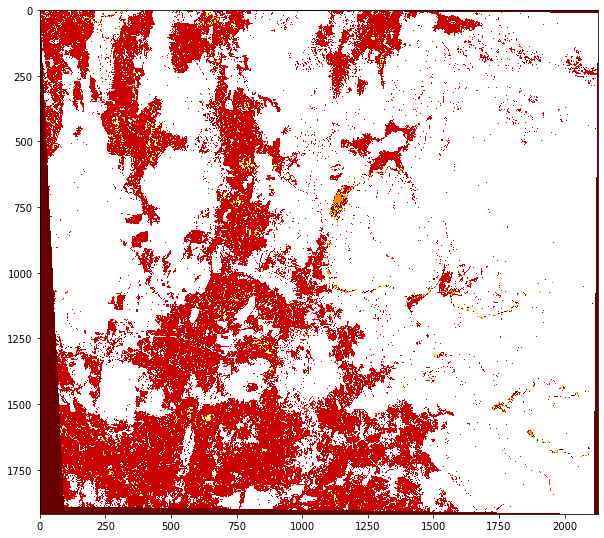

Still working on:  LC08_L1TP_090083_20191215_20191226_01_T1_NEW\RT_20191226_B7.tif K VAlue: 9


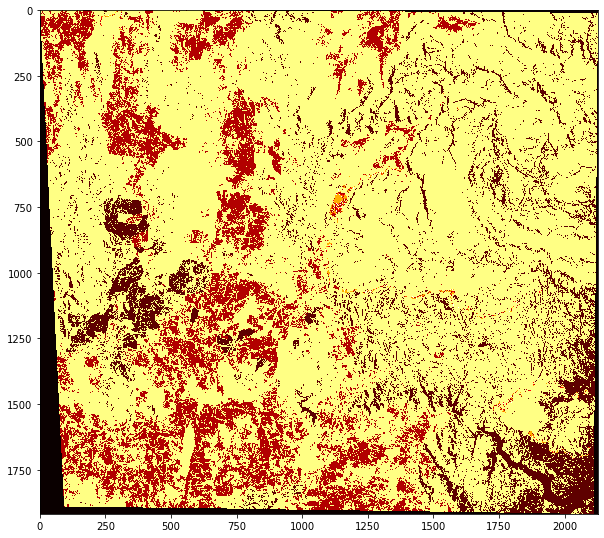

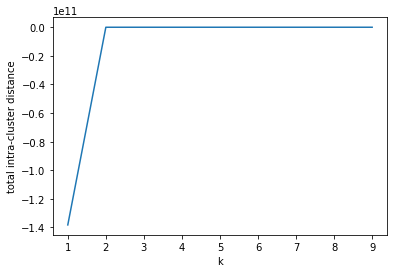

In [23]:
landsat_path = glob("LC08_L1TP_090083_20191215_20191226_01_T1_NEW/RT_20191226_B*.tif")
landsat_path.sort()
array_stack, meta_data = es.stack(landsat_path)

print(len(landsat_path))

for files in landsat_path:
    print("Working on", files)
    dataset = gdal.Open(files)
    Band= dataset.GetRasterBand(1)
    img = Band.ReadAsArray()
    X = img.reshape((-1,1))
    # clustering for k = 1 to k = 10
    
    ks = range(1,10)
    scores = []
    
    for k in ks:
        print("Still working on: ", files, "K VAlue:", k)
        k_means = cluster.KMeans(n_clusters=k, n_init=2)
        k_means.fit_predict(X)
        scores.append(k_means.score(X))
        X_clustered = k_means.labels_
        X_clustered = X_clustered.reshape(img.shape)

        plt.figure(figsize=(10,10))
        plt.imshow(X_clustered, cmap="hot")
        plt.show()
        
    plt.plot(ks, scores)
    plt.ylabel('total intra-cluster distance')
    plt.xlabel('k')
    plt.show()
    
